# Handwriting Recognition using Deep Learning 

In [1]:
# Import needed libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

#  MNIST

### Data Preprocessing

In [2]:
# a.Load data

#  train data
train = pd.read_csv("MNIST/train.csv")
print("train data")
train.shape
train.head()

#  test data
test= pd.read_csv("MNIST/test.csv")
print("test data")
test.shape
test.head()

# set y_train to have labels cloumn
Y_train = train["label"]
# remove label column from from train and store as X_train
X_train = train.drop(labels = ["label"],axis = 1) 


# b.Normalization
# to improve CNN performance
X_train = X_train / 255.0
test = test / 255.0

# c.Reshape
# The images are of a 2D array shape, and to apply CNN with Keras we need to reshape them to 3D matrices. Size of images are (28px x 28px), we reshape them to (28x28x1).
# [batch_size, 28, 28, 1], -1 means the value is inferred from the length of the array
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# d.Label encoding
# The labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors to be either 0 or 1.
from keras.utils.np_utils import to_categorical # one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

# e.Split training and valdiation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

train data


(42000, 785)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test data


(28000, 784)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using TensorFlow backend.


((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

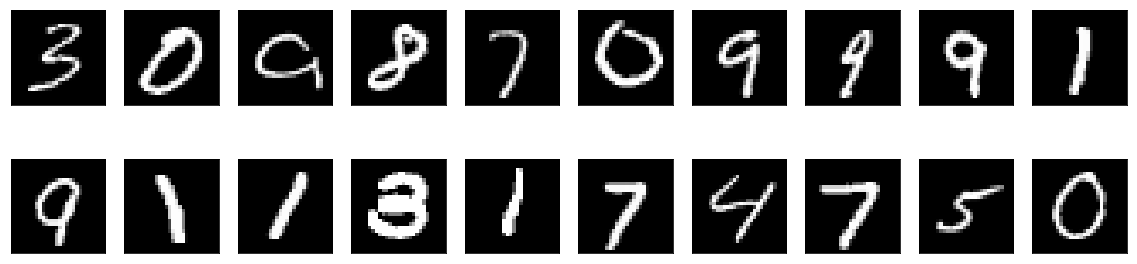

In [19]:
# Display images
plt.figure(figsize=(20,5))
for r in range(0,20):
    plt.subplot(2,10,r+1)
    f= plt.imshow(X_train[r].reshape(28,28), cmap=plt.get_cmap('gray'))
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
plt.show()  ;

### CNN

In [4]:
# CNN architechture -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

# a.Create the model

model = Sequential()

model.add(Conv2D(32,(5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(32,(5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(64,(3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

#Display the CNN structure
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [21]:
# b.Compile the model 

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy",  metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")])

# performance Without data augmentation 
history = model.fit(X_train, Y_train, epochs = 10, 
         validation_data = (X_val, Y_val))



Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 113s 3ms/sample - loss: 0.0387 - acc: 0.9892 - val_loss: 0.0345 - val_acc: 0.9907
Epoch 2/10
37800/37800 [==============================] - 111s 3ms/sample - loss: 0.0314 - acc: 0.9910 - val_loss: 0.0247 - val_acc: 0.9950
Epoch 3/10
37800/37800 [==============================] - 108s 3ms/sample - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0430 - val_acc: 0.9931
Epoch 4/10
37800/37800 [==============================] - 109s 3ms/sample - loss: 0.0279 - acc: 0.9913 - val_loss: 0.0292 - val_acc: 0.9948
Epoch 5/10
37800/37800 [==============================] - 107s 3ms/sample - loss: 0.0257 - acc: 0.9927 - val_loss: 0.0286 - val_acc: 0.9933
Epoch 6/10
37800/37800 [==============================] - 108s 3ms/sample - loss: 0.0250 - acc: 0.9924 - val_loss: 0.0281 - val_acc: 0.9929
Epoch 7/10
37800/37800 [==============================] - 107s 3ms/sample - loss: 0.0210 - acc: 0.9936 - val_lo

In [6]:
# c.Data Augmentation
# To avoid overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,  # rotate images in range (degrees, 0 to 180)
        zoom_range = 0.1, #  zoom image 
        width_shift_range=0.1,  #  shift images horizontally 
        height_shift_range=0.1,  #  shift images vertically 
        horizontal_flip=False,  #  flip images
        vertical_flip=False)  #  flip images



# d.Fit the model
datagen.fit(X_train)

#Get the obtained  performance of different training epochs
history = model.fit_generator(datagen.flow(X_train,Y_train),
                              epochs = 10, validation_data = (X_val,Y_val))
# history = model.fit(X_train, Y_train, epochs=10, validation_data=( X_val,  Y_val))

Epoch 1/10
1182/1182 [==============================] - 374s 317ms/step - loss: 0.3529 - acc: 0.8880 - val_loss: 0.0515 - val_acc: 0.9840
Epoch 2/10
1182/1182 [==============================] - 388s 328ms/step - loss: 0.1216 - acc: 0.9639 - val_loss: 0.0578 - val_acc: 0.9833
Epoch 3/10
1182/1182 [==============================] - 376s 318ms/step - loss: 0.0985 - acc: 0.9709 - val_loss: 0.0480 - val_acc: 0.9902
Epoch 4/10
1182/1182 [==============================] - 399s 338ms/step - loss: 0.0824 - acc: 0.9766 - val_loss: 0.0452 - val_acc: 0.9898
Epoch 5/10
1182/1182 [==============================] - 486s 411ms/step - loss: 0.0739 - acc: 0.9786 - val_loss: 0.0409 - val_acc: 0.9900
Epoch 6/10
1182/1182 [==============================] - 468s 396ms/step - loss: 0.0692 - acc: 0.9792 - val_loss: 0.0370 - val_acc: 0.9924
Epoch 7/10
1182/1182 [==============================] - 466s 394ms/step - loss: 0.0639 - acc: 0.9801 - val_loss: 0.0339 - val_acc: 0.9924
Epoch 8/10
1182/1182 [============

### Model Evaluation

[Text(0.5,1,'Real Number is 2\nPredict Number is 2')]

[Text(0.5,1,'Real Number is 9\nPredict Number is 0')]

[Text(0.5,1,'Real Number is 2\nPredict Number is 9')]

[Text(0.5,1,'Real Number is 7\nPredict Number is 0')]

[Text(0.5,1,'Real Number is 3\nPredict Number is 3')]

[Text(0.5,1,'Real Number is 6\nPredict Number is 7')]

[Text(0.5,1,'Real Number is 6\nPredict Number is 0')]

[Text(0.5,1,'Real Number is 4\nPredict Number is 3')]

[Text(0.5,1,'Real Number is 3\nPredict Number is 0')]

[Text(0.5,1,'Real Number is 3\nPredict Number is 3')]

[Text(0.5,1,'Real Number is 0\nPredict Number is 5')]

[Text(0.5,1,'Real Number is 5\nPredict Number is 7')]

[Text(0.5,1,'Real Number is 1\nPredict Number is 4')]

[Text(0.5,1,'Real Number is 2\nPredict Number is 0')]

[Text(0.5,1,'Real Number is 1\nPredict Number is 4')]

[Text(0.5,1,'Real Number is 8\nPredict Number is 3')]

4200/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.03325450830017438
Test accuracy: 0.9930952


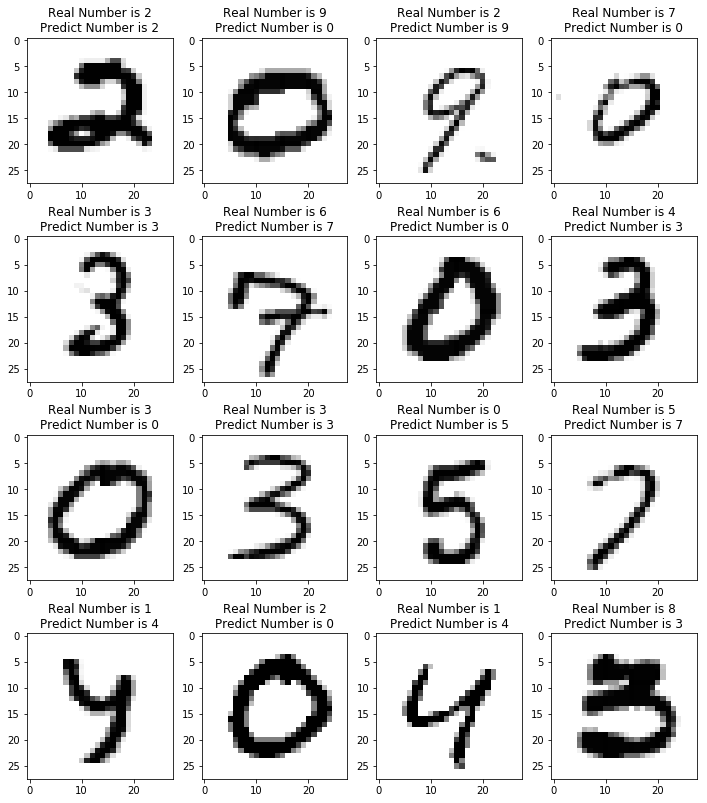

In [13]:
# Predict some samples from the test data

y_pred = model.predict(test)
X_test__ = test.reshape(test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Predict Number is {y_pred[i].argmax()}");

# Evaluate model on Test set
score = model.evaluate(X_val, Y_val)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

<Figure size 576x576 with 0 Axes>

Text(0,0.5,'Accuracy')

(-1, 1)

Text(0.5,1,'Training and Validation Accuracy')

Text(0,0.5,'Cross Entropy')

(-1, 1.0)

Text(0.5,1,'Training and Validation Loss')

Text(0.5,0,'epoch')

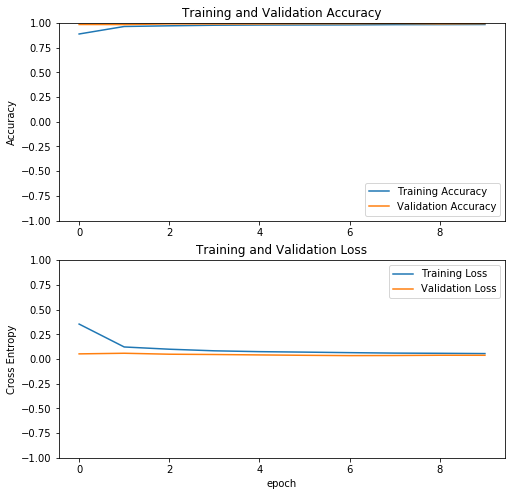

In [8]:
# plot accuracy and loss

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Text(0.5,51,'Predicted Label')

Text(51,0.5,'True Label')

Text(0.5,1,'Confusion Matrix')

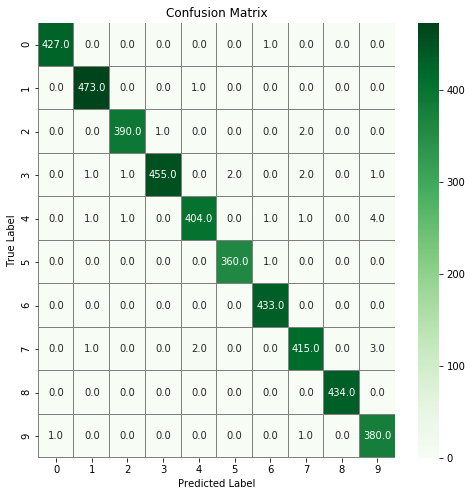

In [9]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()